Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



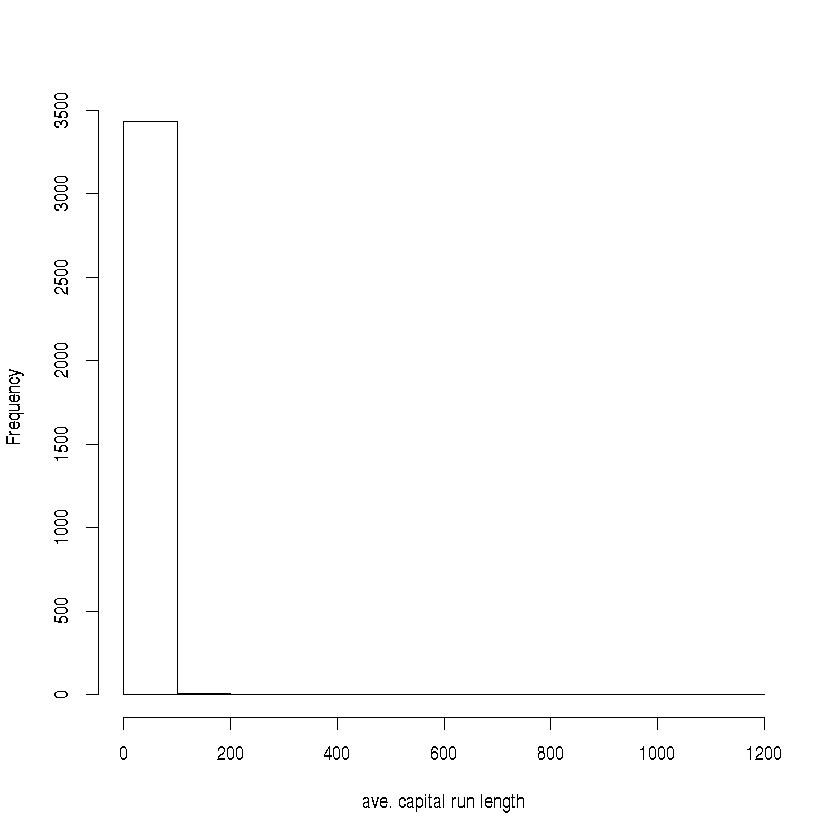

In [2]:
library(caret)
library(kernlab);
data(spam)
inTrain<-createDataPartition(y=spam$type,p=0.75,list=FALSE)
training<-spam[inTrain,]
testing<-spam[-inTrain,]
hist(training$capitalAve,main="",xlab="ave. capital run length")

In [3]:
mean(training$capitalAve)

[1] 5.138469

In [4]:
sd(training$capitalAve)

[1] 31.68578

In [5]:
trainCapAve<-training$capitalAve
trainCapAveS<-(trainCapAve-mean(trainCapAve))/sd(trainCapAve)
mean(trainCapAveS)

[1] 6.522251e-18

In [6]:
sd(trainCapAveS)

[1] 1

In [7]:
preObj<-preProcess(training[,-58],method=c("center","scale"))
trainCapeAveS<- predict(preObj,training[,-58])$capitalAve
mean(trainCapeAveS)

[1] 6.522251e-18

In [8]:
testCapeAveS<-predict(preObj,testing[,-58])$capitalAve
mean(testCapeAveS)

[1] 0.006697921

In [9]:
set.seed(32343)
modelFit<-train(type~.,data=training,preProcess=c("center","scale"),method="glm")
modelFit

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted 

Generalized Linear Model 

3451 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

Pre-processing: centered (57), scaled (57) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3451, 3451, 3451, 3451, 3451, 3451, ... 
Resampling results:

  Accuracy   Kappa    
  0.9193766  0.8307217

 

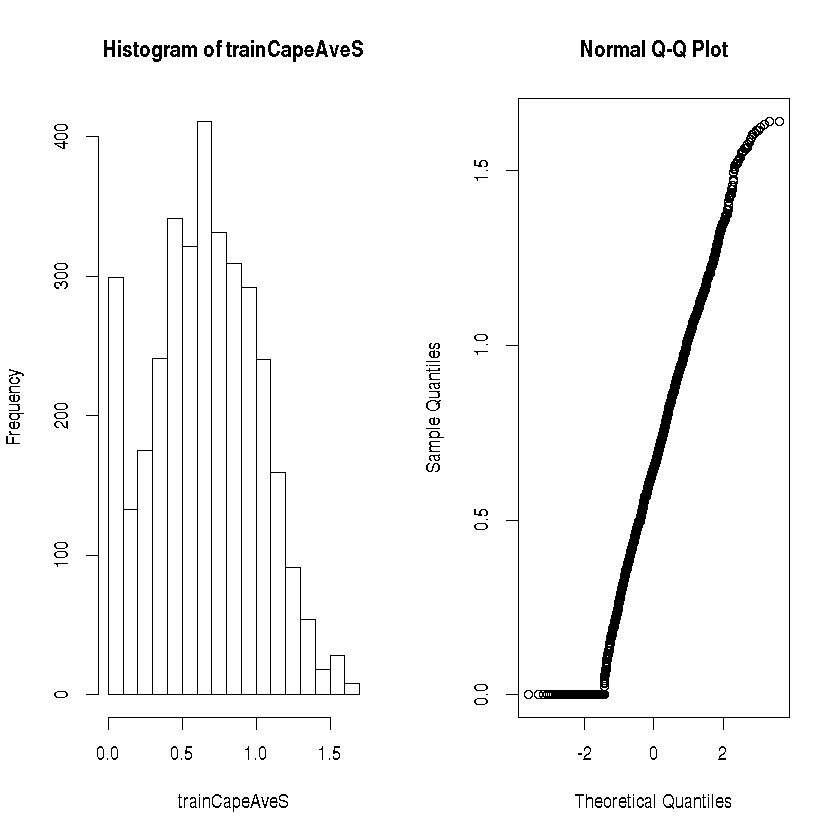

In [10]:
preObj<-preProcess(training[,-58],method=c("BoxCox"))
trainCapeAveS<-predict(preObj,training[,-58])$capitalAve
par(mfrow=c(1,2));
hist(trainCapeAveS);
qqnorm(trainCapeAveS);

In [15]:
set.seed(13343)

#Make some value NA
training$capAve<-training$capitalAve
selectNA <-rbinom(dim(training)[1],size=1,prob=0.05)==1
training$capAve[selectNA]<-NA

#Imput and standardize
preObj<-preProcess(training[-58],method="knnImpute")
capAve<-predict(preObj,training[,-58])$capAve

#Standardizde the values
capAveTruth<-training$capitalAve
capAveTruth<-(capAveTruth-mean(capAveTruth))/sd(capAveTruth)

In [16]:
quantile(capAve - capAveTruth)

0%           25%           50%           75%          100% 
-1.8324231808  0.0008290535  0.0022260076  0.0051423193  2.1398572473

In [17]:
quantile((capAve - capAveTruth)[selectNA])

0%          25%          50%          75%         100% 
-1.832423181 -0.021318052  0.002710663  0.020651536  0.188434932

In [18]:
quantile((capAve - capAveTruth)[!selectNA])

0%           25%           50%           75%          100% 
-0.0002609205  0.0008892838  0.0022260076  0.0049791147  2.1398572473